# Unicorn Companies Analysis

## Introduction

In this notebook, I will analyze data on unicorn companies—private startups valued at over $1 billion—to uncover trends in industry growth, geographic distribution, and investment patterns. The dataset includes over 1,000 unicorn companies, detailing their industry, country, year founded, and major investors. My goal is to explore key characteristics of these companies and provide actionable insights.

## Overview

To achieve this, I will perform various analyses, including:

- Cleaning and structuring the dataset, addressing missing values, and ensuring data integrity.  
- Aggregating company valuations by country and industry to identify major investment hubs.  
- Performing datetime transformations to analyze company growth over time.  
- Visualizing trends in unicorn emergence by industry and geography using bar charts, heatmaps, and maps.  
- Identifying the most common investors and their preferred industries.  
- Creating global valuation maps, with a focus on companies that became unicorns after 2020.  
- Filtering data to identify high-growth industries and key investment regions.  

By conducting these analyses, I aim to provide a data-driven perspective on the unicorn ecosystem, helping investors and analysts make informed decisions about future opportunities.


## Dataset Structure

### Unicorn Companies Dataset  
This dataset contains information about unicorn companies—privately held startups valued at over $1 billion. It includes key details about each company, such as its industry, geographic location, valuation, funding, and major investors. Below is a description of the key fields in this dataset:

- **Company**: The name of the unicorn company.  
- **Valuation**: The company's valuation in billions of dollars.  
- **Date Joined**: The date the company reached unicorn status.  
- **Industry**: The sector in which the company operates.  
- **City**: The city where the company is headquartered.  
- **Country/Region**: The country where the company is based.  
- **Continent**: The continent where the company operates.  
- **Year Founded**: The year the company was established.  
- **Funding**: The total funding received by the company.  
- **Select Investors**: The major investment firms backing the company.  

This dataset provides insights into industry trends, geographic distribution, and investment patterns among unicorn companies worldwide.


## Importing Required Libraries
Before beginning the analysis, it is essential to import all necessary libraries. 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

# Analyzing Unicorn Companies Dataset

## Introduction

In this section, I analyze a dataset of unicorn companies—private companies valued at over $1 billion. The goal is to explore the dataset, uncover trends, and provide actionable insights to help an investment firm decide which industries and companies to focus on. The dataset includes information such as industry, country, year founded, valuation, and key investors for over 1,000 unicorn companies.

In this section, I analyze a dataset of unicorn companies—private startups valued at over $1 billion. The dataset includes information such as industry, country, year founded, valuation, and key investors for over 1,000 companies. My goal is to explore the dataset, uncover trends, and provide actionable insights to help an investment firm decide which industries and companies to focus on.

This analysis involves **exploratory data analysis (EDA)**, a critical step in understanding the data, identifying patterns, and preparing for deeper analysis. I use Python libraries like `pandas` and `matplotlib` to manipulate and visualize the data, gaining insights into how companies achieve unicorn status and which industries are most promising.


The dataset, unicorn_companies.csv, is loaded into a DataFrame for analysis. This dataset contains information about unicorn companies, including their valuation, industry, founding year, and more.

In [3]:
data = pd.read_csv(r'C:\Users\saswa\Documents\GitHub\Unicorn-Companies-Analysis\Data\Unicorn companies.csv')

### Exploring the Dataset
To get a sense of the dataset's structure, I display the first few rows. This helps me understand the columns and the type of data they contain.

In [4]:
data.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


The dataset includes columns like `Company`, `Valuation`, `Date Joined`, `Industry`, `Country`, and `Select Investors`. The `Date Joined` column represents the date when a company achieved unicorn status, and the `Select Investors` column lists key investors in each company.

I then check the size and shape of the dataset to understand its scale.

In [5]:
data.size
data.shape

(1074, 10)

The dataset contains 10,740 values across all columns, with 1,074 rows (companies) and 10 columns (attributes).

Using the `info()` function, I get an overview of the dataset, including data types and non-null values.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


The Year Founded column is of type int64, which is useful for numerical analysis, while the Date Joined column is of type object (string), which needs to be converted to datetime for time-based analysis.

### Data Cleaning and Transformation

To make the `Date Joined` column usable for time-based analysis, I convert it to a `datetime` format.

In [7]:
data['Date Joined'] = pd.to_datetime(data['Date Joined'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1074 non-null   object        
 1   Valuation         1074 non-null   object        
 2   Date Joined       1074 non-null   datetime64[ns]
 3   Industry          1074 non-null   object        
 4   City              1058 non-null   object        
 5   Country/Region    1074 non-null   object        
 6   Continent         1074 non-null   object        
 7   Year Founded      1074 non-null   int64         
 8   Funding           1074 non-null   object        
 9   Select Investors  1073 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 84.0+ KB


C:\Users\saswa\AppData\Local\Temp\ipykernel_30372\3045152523.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date Joined'] = pd.to_datetime(data['Date Joined'])


I then extract the year from the `Date Joined` column and create a new column called `Year Joined`. This allows for easier comparison between the year a company was founded and the year it achieved unicorn status.

In [8]:
data['Year Joined'] = data['Date Joined'].dt.year
data.head()

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Year Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",2017
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",2018
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",2014
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",2011


### Analyzing the Data
I use the `describe()` function to get summary statistics for numerical columns.

In [9]:
data.describe()

,Date Joined,Year Founded,Year Joined
count,1074,1074.000000,1074.000000
mean,2020-05-19 15:35:51.955307264,2012.895717,2019.896648
min,2007-07-02 00:00:00,1919.000000,2007.000000
25%,2019-05-20 06:00:00,2011.000000,2019.000000
50%,2021-03-29 00:00:00,2014.000000,2021.000000
75%,2021-09-19 18:00:00,2016.000000,2021.000000
max,2022-04-05 00:00:00,2021.000000,2022.000000
std,NaN,5.698573,2.001288


The oldest company in the dataset was founded in 1919, while the most recent companies were founded in 2021.

To focus on a smaller subset for visualization, I sample 50 companies randomly.

In [10]:
companies_sampled = data.sample(n=50, random_state=42)

### Visualizing Insights

#### Time Taken to Reach Unicorn Status
I calculate the number of years it took for each company to reach unicorn status and visualize the maximum time per industry using a bar plot.

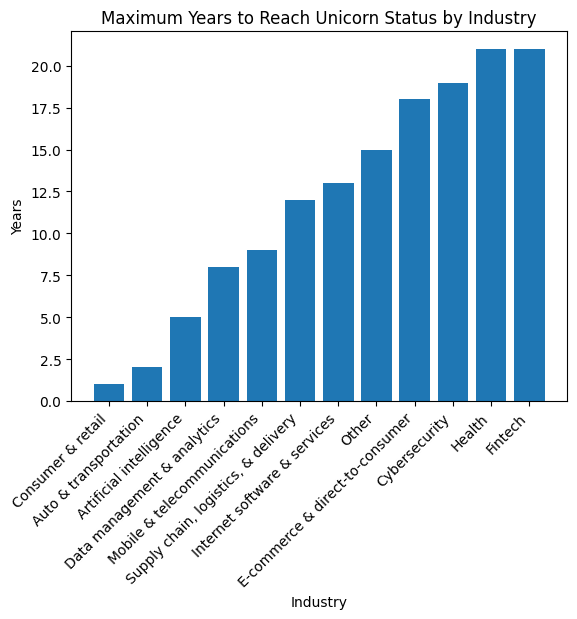

In [11]:
companies_sampled["years_until_unicorn"] = companies_sampled["Year Joined"] - companies_sampled["Year Founded"]
grouped = companies_sampled[["Industry", "years_until_unicorn"]].groupby("Industry").max().sort_values("years_until_unicorn")

plt.bar(x=grouped.index, height=grouped["years_until_unicorn"])
plt.title("Maximum Years to Reach Unicorn Status by Industry")
plt.xlabel("Industry")
plt.ylabel("Years")
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

- Fintech and Health industries took the longest to reach unicorn status (21 years).

- Consumer & Retail was the fastest, taking significantly fewer years.

#### Maximum Valuation by Industry
I convert the Valuation column to numeric format and visualize the maximum valuation per industry.

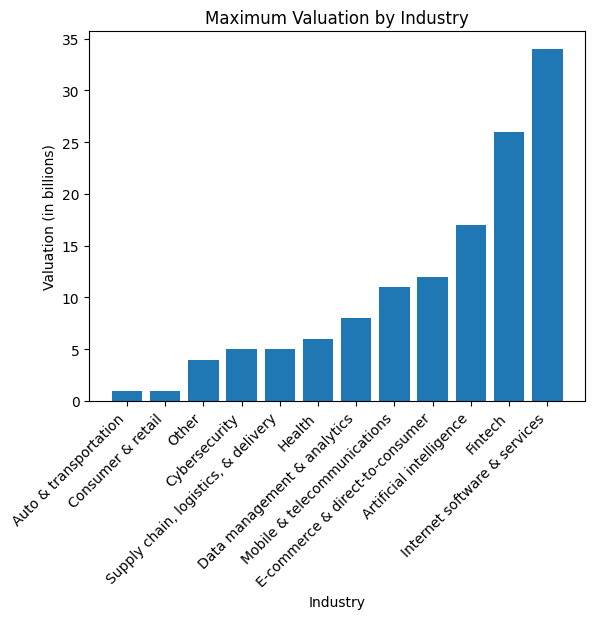

In [12]:
companies_sampled['valuation_billions'] = companies_sampled['Valuation'].str.replace("$", "").str.replace("B", "").astype('int')
grouped1 = companies_sampled[["Industry", "valuation_billions"]].groupby("Industry").sum().sort_values(by="valuation_billions")

plt.bar(x=grouped1.index, height=grouped1['valuation_billions'])
plt.title("Maximum Valuation by Industry")
plt.xlabel("Industry")
plt.ylabel("Valuation (in billions)")
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

## Key Takeaways
Industry Trends: Some industries, like Fintech and Health, take longer to reach unicorn status but achieve high valuations.

Valuation Variability: Valuations vary significantly across industries, with Internet Software & Services leading the pack.

Data Quality: The dataset is well-structured but required some cleaning, such as converting the Date Joined column to datetime.

# Structuring and Analyzing Unicorn Companies Dataset

## Introduction

In this section, I continue analyzing the unicorn companies dataset, focusing on structuring the data to uncover deeper insights. A key aspect of this process involves working with date and time information, such as the `Date Joined` column, to understand trends in when companies achieved unicorn status. 

Using Python libraries like `pandas`, `numpy`, `seaborn`, and `matplotlib.pyplot`, I will perform datetime transformations, group data by relevant time intervals, and visualize trends. This structured approach will help identify patterns in how long it takes companies to reach unicorn status and how valuations vary across industries and time periods. These insights will support informed decision-making for investment strategies.

### Exploring the Dataset

To get a sense of the dataset's structure, I display the first 10 rows.

I check for duplicates in the dataset to ensure data integrity.

In [13]:
companies.drop_duplicates().shape

NameError: name 'companies' is not defined

Since the shape of the DataFrame remains unchanged after dropping duplicates, there are no duplicate values in the dataset.

Next, I display the data types of the columns to understand how the data is structured.

In [ ]:
companies.dtypes

The `Year Founded` column is of type `int64`, while the remaining columns are of type `object`. This indicates that the `Date Joined` column, currently stored as a string, needs to be converted to `datetime` for time-based analysis.

### Structuring the Data

#### Sorting the Data
To gain insights into when companies were founded, I sort the dataset by the `Year Founded` column in descending order.

In [ ]:
companies.sort_values(by="Year Founded", ascending=False).head(10)

The most recent companies in the dataset were founded in 2021, while the earliest company was founded in 1919. Companies founded in earlier years generally took longer to achieve unicorn status compared to those founded more recently.

#### Counting Companies Founded Each Year
I determine how many companies were founded each year using the `value_counts()` function.

In [ ]:
companies["Year Founded"].value_counts().sort_values(ascending=False)

The year 2015 has the highest count, with 155 companies founded. The least number of companies founded in a year is 1, and the top three years for company foundations are 2015, 2016, and 2014.

#### Visualizing Company Foundations
I plot a histogram to visualize the distribution of companies founded each year.

In [ ]:
sns.histplot(data=companies, x='Year Founded')
plt.title('Year Founded Histogram')
plt.show()

The histogram shows that the number of companies founded increased significantly from the early 2000s, peaking around 2015.

### Data Transformation
#### Converting Date Joined to Datetime
To enable time-based analysis, I convert the `Date Joined` column to `datetime` format.

In [ ]:
companies["Date Joined"] = pd.to_datetime(companies["Date Joined"])
companies.dtypes

The `Date Joined` column is now in `datetime` format, allowing for extraction of year, month, and other time components.

#### Creating a Month Joined Column
I extract the month from the `Date Joined` column and create a new column called `Month Joined`.

In [ ]:
companies["Month Joined"] = companies["Date Joined"].dt.month_name()
companies.head()

This new column will help analyze trends based on the month companies achieved unicorn status.

#### Creating a Years To Join Column
I calculate the number of years it took for companies to reach unicorn status by subtracting the `Year Founded` from the year component of `Date Joined`.

In [ ]:
companies["Years To Join"] = companies["Date Joined"].dt.year - companies["Year Founded"]
companies.head()

This column provides insights into how long it took companies to achieve unicorn status.



### Analyzing Trends Over Time
#### Filtering Data for 2021
To focus on recent trends, I filter the dataset to include only companies that joined unicorn status in 2021.

In [ ]:
companies_2021 = companies[companies["Date Joined"].dt.year == 2021]
companies_2021.head()

#### Grouping by Week Joined
I group the 2021 data by week and count the number of companies that joined unicorn status each week.

In [ ]:
companies_2021["Week Joined"] = companies_2021["Date Joined"].dt.strftime('%Y-W%V')
companies_by_week_2021 = companies_2021.groupby(by="Week Joined")["Company"].count().reset_index().rename(columns={"Company":"Company Count"})
companies_by_week_2021.head()

#### Visualizing Companies Joined per Week in 2021
I create a bar plot to visualize the number of companies that joined unicorn status each week in 2021.

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=companies_by_week_2021, x='Week Joined', y='Company Count')
plt.xlabel("Week Number")
plt.ylabel("Number of Companies")
plt.title("Number of Companies That Became Unicorns per Week in 2021")
plt.xticks(rotation=60, horizontalalignment='right', fontsize=8)
plt.show()

The highest number of companies reached unicorn status in Week 37 of 2021, corresponding to the third week of September.Comparing Trends Between 2020 and 2021
Filtering Data for 2020
I filter the dataset to include only companies that joined unicorn status in 2020.

### Comparing Trends Between 2020 and 2021
#### Filtering Data for 2020
I filter the dataset to include only companies that joined unicorn status in 2020.

In [ ]:
companies_2020 = companies[companies["Date Joined"].dt.year == 2020]

###Concatenating 2020 and 2021 Data
I combine the 2020 and 2021 data into a single DataFrame for comparison.

In [ ]:
companies_2020_2021 = pd.concat([companies_2020, companies_2021.drop(columns="Week Joined")])

### Creating a Quarter Joined Column
I extract the quarter from the `Date Joined` column and create a new column called `Quarter Joined`.

In [ ]:
companies_2020_2021["Quarter Joined"] = companies_2020_2021["Date Joined"].dt.to_period('Q').dt.strftime('%Y-Q%q')

#### Converting Valuation to Numeric
I convert the `Valuation` column to numeric format by removing the $ and B symbols and casting the values to `float`.

In [ ]:
companies_2020_2021["Quarter Joined"] = companies_2020_2021["Date Joined"].dt.to_period('Q').dt.strftime('%Y-Q%q')

Grouping by Quarter and Calculating Average Valuation
I group the data by Quarter Joined and calculate the average valuation for each quarter.

In [ ]:
companies_by_quarter_2020_2021 = companies_2020_2021.groupby(by="Quarter Joined")["Valuation"].mean().reset_index().rename(columns={"Valuation":"Average Valuation"})
companies_by_quarter_2020_2021.head()

#### Visualizing Average Valuation Over Quarters
I create a grouped bar plot to compare the average valuation of companies that joined unicorn status in 2020 and 2021.

In [ ]:
ompanies_by_quarter_2020_2021['Quarter Number'] = companies_by_quarter_2020_2021['Quarter Joined'].str[-2:]
companies_by_quarter_2020_2021['Year Joined'] = companies_by_quarter_2020_2021['Quarter Joined'].str[:4]

plt.figure(figsize=(10, 5))
sns.barplot(x=companies_by_quarter_2020_2021['Quarter Number'],
            y=companies_by_quarter_2020_2021['Average Valuation'],
            hue=companies_by_quarter_2020_2021['Year Joined'])
plt.xlabel("Quarter Number")
plt.ylabel("Average Valuation (Billions of Dollars)")
plt.title("Average Valuation of Companies That Became Unicorns per Quarter in 2020 vs. 2021")
plt.show().

he average valuation of companies that reached unicorn status was consistently higher in 2020 compared to 2021, with a rising trend in 2020 and a declining trend in 2021

Key Takeaways
Industry Trends: Some industries, like Fintech and Health, take longer to reach unicorn status but achieve high valuations.

Valuation Variability: Valuations vary significantly across industries, with Internet Software & Services leading the pack.

Data Quality: The dataset is well-structured but required some cleaning, such as converting the Date Joined column to datetime.

Time Trends: Companies founded in earlier years took longer to achieve unicorn status, while those founded more recently reached unicorn status faster.

Recent Trends: The highest number of companies reached unicorn status in Week 37 of 2021, and the average valuation of companies was higher in 2020 compared to 2021.